<a href="https://colab.research.google.com/github/sialf/wine_quality/blob/main/Is_this_wine_any_good.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Is this wine any good?**


---



#####Goal: To predict quality of Portuguese 'Vinho Verde' red wine based on its chemical properties.


---



Vinho Verde wine is Portuguese wine which originates from the Vinho Verde region in the north of the Portugal. The majority of this wine usually comes in white wine form, however the region is known for producing top quality red and rose wines as well.

#####This dataset from UC Irvine documents the quality of Vinho Verde and its corresponding chemical properties: https://archive.ics.uci.edu/dataset/186/wine+quality

#####​There are two datasets available for this particular wine: red wine and white wine. Due to restrictions in equipment and time, the red wine dataset was chosen due to its smaller size.​

#####This project will attempt to predict quality of Vinho Verde red wine based on its composition of key chemical properties.


---



#####The first step is to load the libraries required for the task. Key libraries used in this project include pandas, numpy, matplotlib, seaborn, and scikit-learn. These libraries were selected for their utility and effectiveness in handling data manipulation, visualisation, and machine learning tasks essential to this project.

In [897]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import e
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score,confusion_matrix, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

The dataset was uploaded onto gibhub for easy access. The pandas libary is used to load in the dataset and assign it to red_df.

In [898]:
red_url = 'https://raw.githubusercontent.com/sialf/wine_quality/main/winequality-red.csv'

In [899]:
red_df = pd.read_csv(red_url, delimiter=';')

In [900]:
red_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5


##**Data preprocessing**


---



The data must be cleaned before it can be used to train and evaluate the machine learning (ML) model. The steps involved in this process are:

- Check for Missing Data: Identify and handle any missing values within the dataset.
- Check for and Remove Duplicates: Detect and eliminate any duplicate entries to ensure the integrity of the data.
- Ensure Appropriate Data Types: Verify that each column's data type is suitable for ML algorithms.
- Assess Data Suitability: Evaluate the data to confirm its appropriateness for the task at hand.
- Group Qualities into 'Bad' and 'Good' Wine: Categorise the wine quality into simplified classes of 'Bad' and 'Good' to streamline the classification process.

In [901]:
missing = red_df.isnull().sum()
print(missing)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


No data is missing from the dataset.

In [902]:
red_df.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

Duplicates have been found in the dataset. They need to be identified and removed.

In [903]:
red_df[red_df.duplicated()]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4                    11.0                  34.0  0.99780  3.51       0.56   
11                   17.0                 102.0  0.99780  3.35       0.80   
27                   10.0                  37.0  0.99660  3.17       0.91   
40                   12.0                  87.0  0.99780  3.33       0.83   
65                    4.0                  11.0  0.99620  3.41       0.39   
...                   ...                   ...      ...   ...        ...   
1563                 12.0                  20.0  0.99546  3.29       0.54   
1564                 12.0                  20.0  0.99546  3.29       0.54   
1567                 12.0                  20.0  0.99546  3.29       0.54   
1581                 24.0                  32.0  0.99402  3.54       0.60   
1596                 29.0                  40.0  0.99574  3.42       0.75   

      alcohol  quality  
4         9.4        5  
11       10.5        5  
27        9.5        5  
40       10.5        5  
65       10.9        5  
...       ...      ...  
1563     10.1        5  
1564     10.1        5  
1567     10.1        5  
1581     11.3        5  
1596     11.0        6  

[240 rows x 12 columns]

In [904]:
#Remove duplicates
red_df= red_df.drop_duplicates()

In [905]:
#Check duplicates have been removed
red_df[red_df.duplicated()]

Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []

In [906]:
#Check how many rows and columns in the dataset
red_df.shape

(1359, 12)

#####There is 1359 rows of data and 12 columns.



In [907]:
#Column names
red_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [908]:
#Check column data types
red_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


The data type does not need to be alternated for ML.

In [909]:
red_df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996700   
75%       0.091000            21.000000             63.000000     0.997820   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1359.000000  1359.000000  1359.000000  1359.000000  
mean      3.309787     0.658705    10.432315     5.623252  
std       0.155036     0.170667     1.082065     0.823578  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

**Fixed Acidity**: The mean fixed acidity is 8.31 with a range of 4.6 to 15.9. This suggests a moderate to high level of acidity in the wines, which may affect their taste and stability of the wine. The variability is relatively high, indicating that some wines are significantly more acidic than others.

**Volatile Acidity**: With a mean of 0.53 and a range from 0.12 to 1.58, volatile acidity shows considerable variation. Higher volatile acidity can indicate undesirable flavours, which might negatively impact the quality of the wine.

**Citric Acid**: The mean citric acid content is 0.27, with a range from 0 to 1. Citric acid is often added to enhance flavour for stability. The relatively low mean and broad range suggest that citric acid content varies significantly, which might influence the flavour profile and perceived quality of the wines.

**Residual Sugar**: The average residual sugar is 2.52, with a wide range from 0.9 to 15.5. This indicates a significant variation in sweetness among the wines. Higher residual sugar levels suggests sweeter wines and maybe lower alcohol content.

**Chlorides**: Chloride levels have a mean of 0.088 with a range from 0.012 to 0.611. Chlorides may be associated with the taste of the wine, and higher concentration can be linked to poor wine quality. The low mean suggests that chloride content is not highly variable but still present in measurable amounts.

**Free Sulfur Dioxide**: The mean is 15.89, with a range from 1 to 72. This shows variability in how much sulfur dioxide. It may be used to prevent microbial growth, which can affect wine preservation and quality.

**Total Sulfur Dioxide**: With a mean of 46.83 and a broad range from 6 to 289, there is considerable variability in sulfur dioxide levels, which could impact the stability and taste of the wine.

**Density**: The mean density is 0.997, with a range from 0.990 to 1.004. Density is influenced by factors such as alcohol and residual sugar levels.

**pH**: The average pH is 3.31, with a range from 2.74 to 4.01. The pH level impacts the wine's taste and stability. A lower pH typically indicates higher acidity, which may affect the quality.

**Sulphates**: The mean sulphate level is 0.66, with a range from 0.33 to 2. This suggests variability in sulphate content, which can affect wine stability and preservation.

**Alcohol Content**: The average alcohol content is 10.43%, with a range from 8.4% to 14.9%. This wide range shows that wines vary significantly in their alcohol content, which can influence flavour and quality.

**Quality**: The mean quality rating is 5.62, with a range from 3 to 8. This indicates that the dataset is skewed towards mid-range quality wines, with fewer extremes in quality. This skew might affect the ability to predict higher or lower quality wines. The dataset may need to be adjusted to account for this.

In [910]:
quality_counts = red_df.groupby(['quality']).size().reset_index(name='count')

print(quality_counts)

   quality  count
0        3     10
1        4     53
2        5    577
3        6    535
4        7    167
5        8     17


Due to the imbalanced nature of the dataset, the decision was made to simplify the wine quality into 'bad' and 'good' categories. This approach allows for more balanced analysis and a more evenly distributed dataset. Specifically, wines with a quality rating below 5 are classified as 'bad,' while those with a rating of 5 or above are classified as 'good.'

A custom function was created to iterate through the quality column and assign the appropriate label. A new column, 'quality_label', was introduced to store these labels. This column is then mapped for ease of use in machine learning tasks. After creating the 'quality_label' column, the original 'quality' column is dropped, as it is no longer needed for the analysis.

In [911]:
def quality_label(quality):
    if quality <= 5:
        return 'bad'
    else:
      return 'good'

red_df['quality_label'] = red_df['quality'].apply(quality_label)

In [912]:
label_mapping = {'bad': 0, 'good': 1}
red_df['quality_label'] = red_df['quality_label'].map(label_mapping)

In [913]:
red_df = red_df.drop('quality', axis=1)

In [914]:
quality_counts = red_df.groupby(['quality_label']).size().reset_index(name='count')

print(quality_counts)

   quality_label  count
0              0    640
1              1    719


#####Post-processing has resulted in a more balanced dataset, although there is a slightly larger amount of data for good wine compared to bad wine. This balance eliminates the need for over-sampling or under-sampling when splitting the dataset for training, testing, and validation. While it would have been interesting to train the machine learning model to predict exact wine quality classes, time constraints as well as equipment limitations, and the significantly unbalanced data prevent this approach at this time. Moreover, from the average consumer's perspective, the difference between a quality rating of 3 and 4 is not significant. Categorising wines simply as 'bad' or 'good' streamlines decision-making and pricing, making it more practical and relevant for consumers.

#####Overall, this dataset is well suited for the scope of the project. It required minimal cleaning and manipulation, making it straight forward to prepare for its intended purpose. The primary challenge was the imbalanced distribution of wine quality ratings. However, this issue was easily addressed by categorising the wine into 'good' and 'bad' quality, thus simplifying the dataset and making it more practical for analysis. This approach not only mitigates the imbalance but also aligns with consumer perspectives, where the distinction between closely rated qualities is less significant.



---



##**Exploratory Data Analysis**

#####Exploratory Data Analysis (EDA) is a critical step in the data analysis process that involves investigating and visualising data to discover patterns and anomalies. EDA helps understand the underlying structure of the data, identify relevant variables, and determine the most appropriate modeling techniques. EDA provides valuable insights that help further refine data preprocessing, feature engineering, and model selection.

#####In this phase of the project, several graphs are created to assess the data.

#####These are the features that will be used to predict quality.

In [915]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

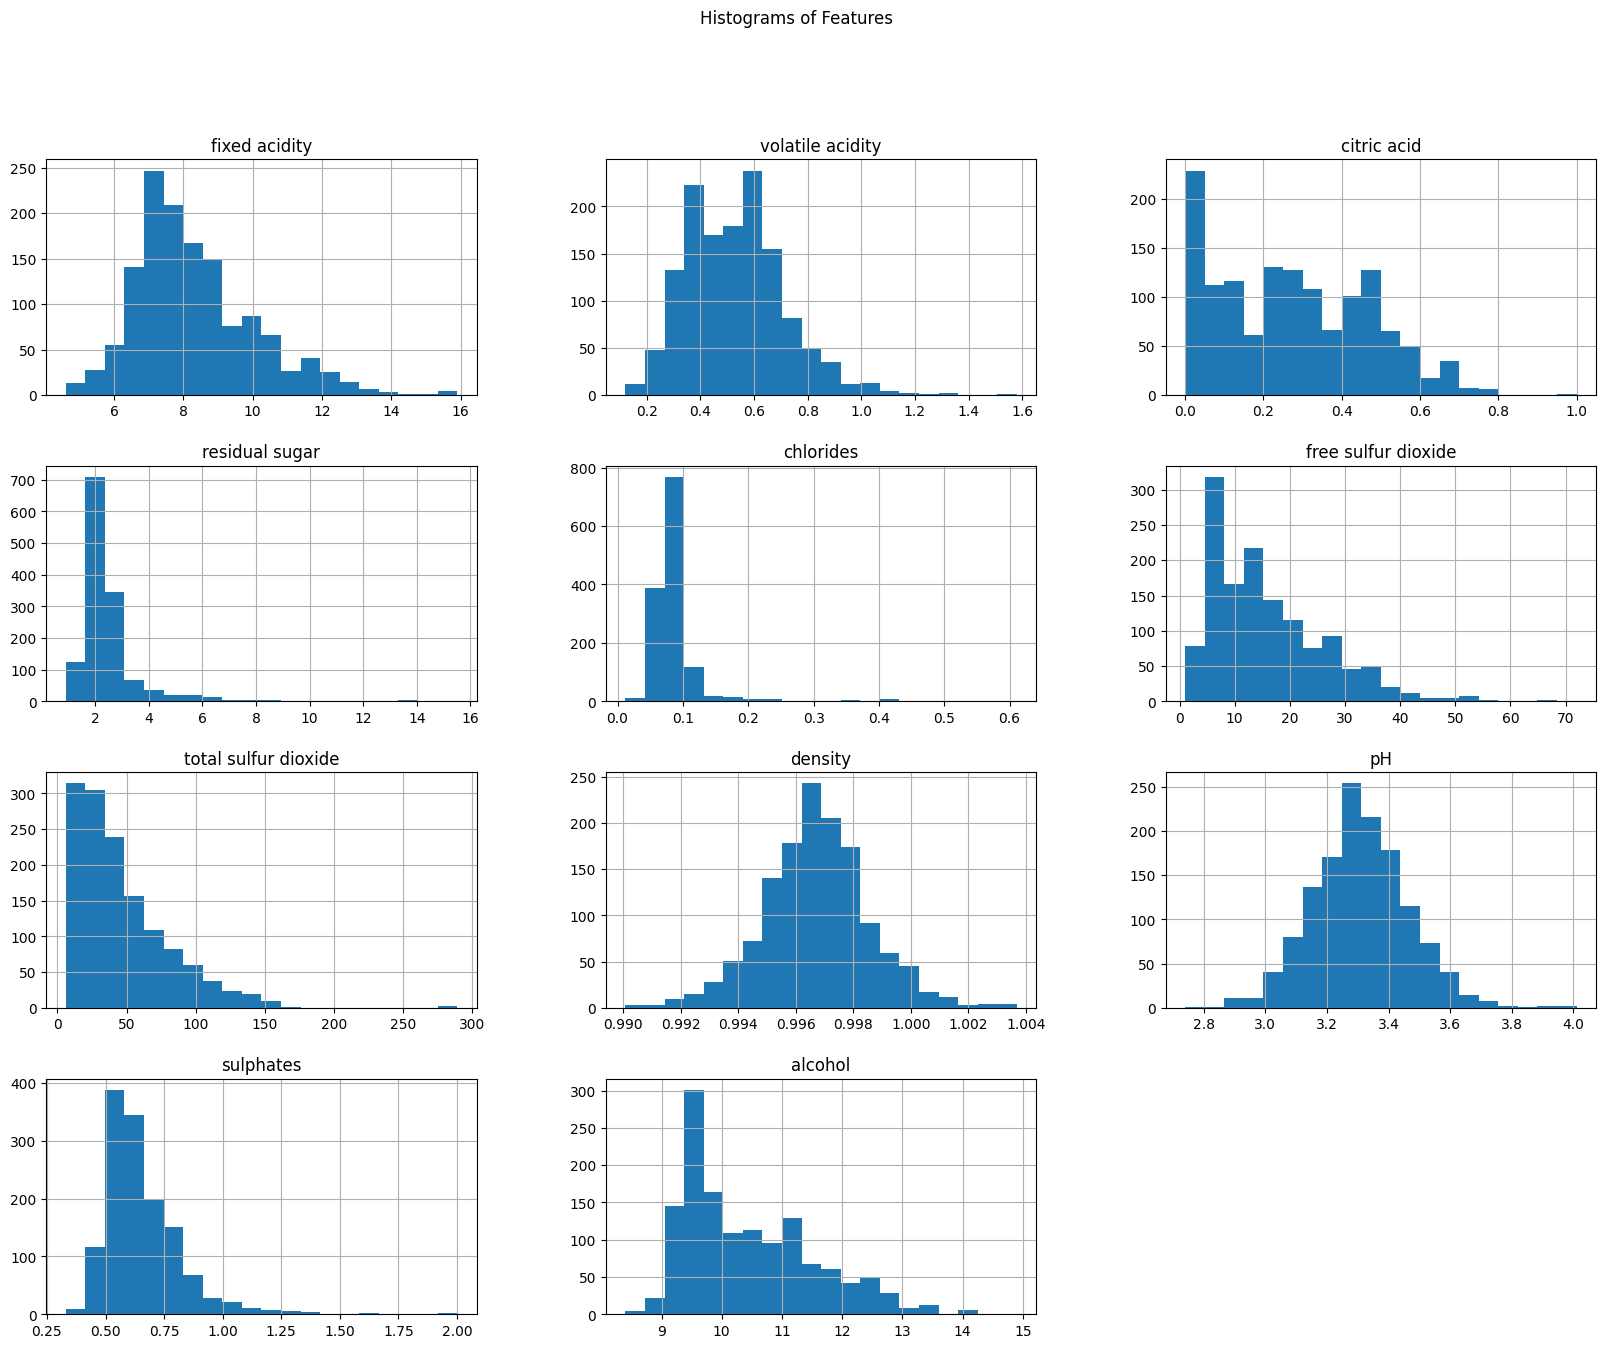

In [916]:
red_df[features].hist(bins=20, figsize=(20, 15))
plt.suptitle('Histograms of Features')
plt.show()

The histograms for the features provide an overview of the distribution of each variable:

  - Fixed Acidity: Typically shows a right-skewed distribution indicating most wines have lower fixed acidity.
  - Volatile Acidity: Often right-skewed, reflecting that most wines have low volatile acidity.
  - Citric Acid: Likely has a normal distribution but skewed towards lower values, suggesting that many wines have lower citric acid levels.
  - Residual Sugar: Can exhibit a right-skewed distribution, indicating that most wines have lower residual sugar content.
  - Chlorides: Generally right-skewed, showing that chlorides are low in most wines.
  - Free Sulfur Dioxide and Total Sulfur Dioxide: Both features might be right-skewed, indicating higher concentrations are less common.
  - Density: Typically shows a normal distribution centered around 1, representing the average density of the wines.
  - pH: Usually displays a normal distribution around the average pH level for wines.
  - Sulphates: Often right-skewed, indicating lower sulphate levels in most wines.
  - Alcohol: Usually presents a right-skewed distribution, indicating that most wines have lower alcohol content.

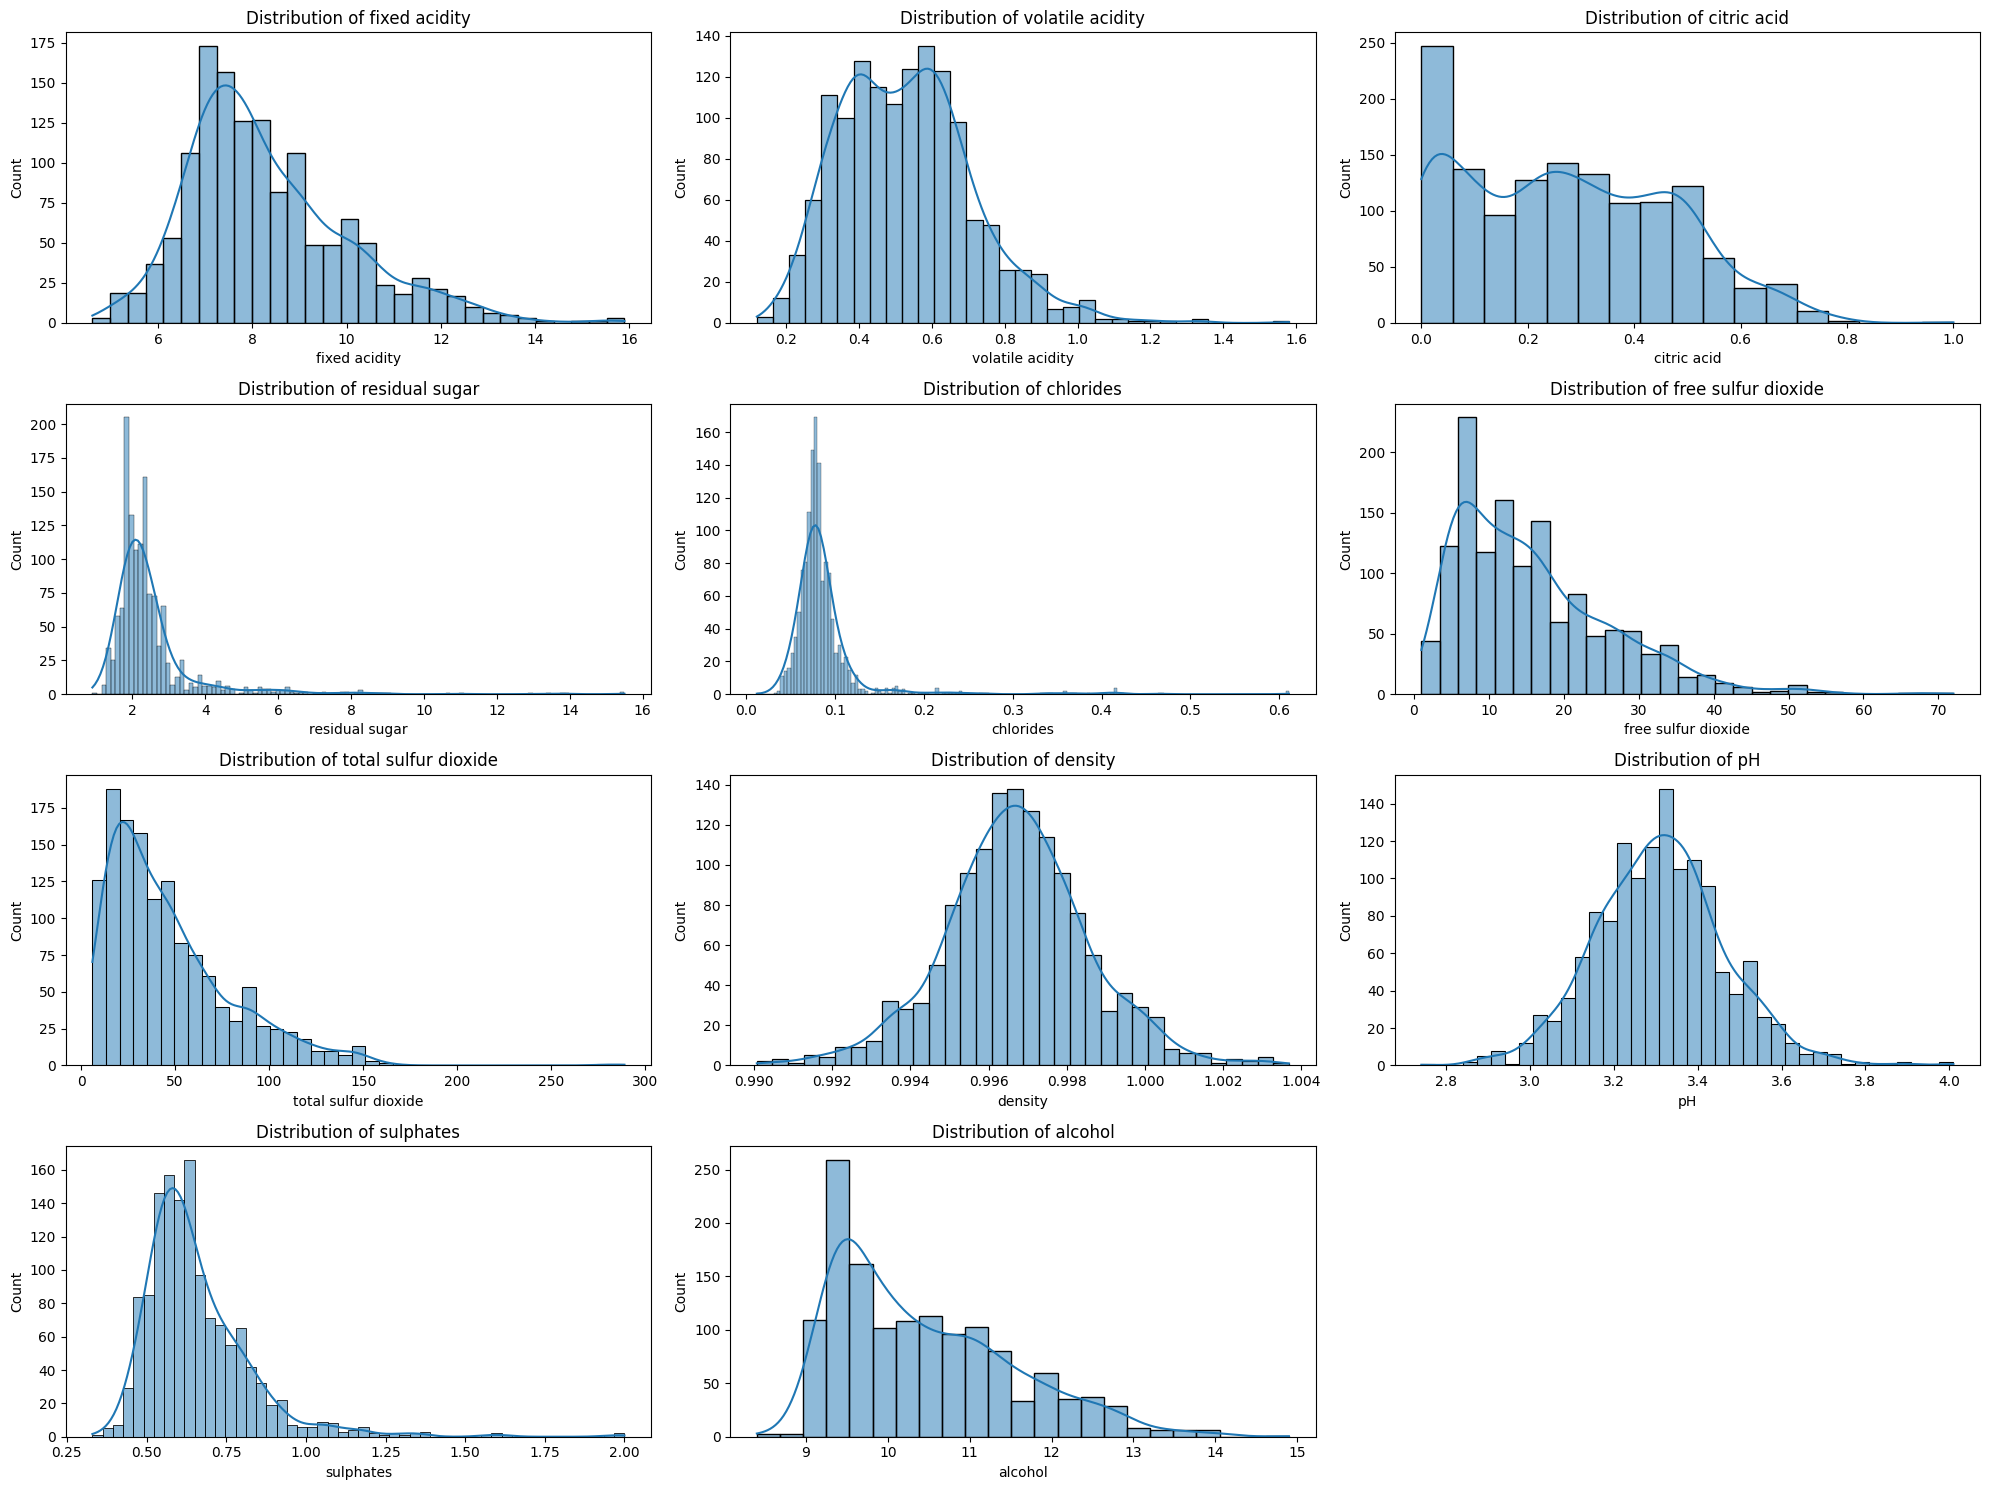

In [917]:
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(4, 3, i + 1)
    sns.histplot(red_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

#####Key insights:

  - Volatile acidity, chlorides, and residual sugar exhibit right skewness.
  - Density and pH and appear more normally distributed.
  - Residual sugar and sulphates seem to have some outliers which make effect the ML model

<ipython-input-918-38fbff5eecc5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='quality_label', data=red_df, palette='viridis')


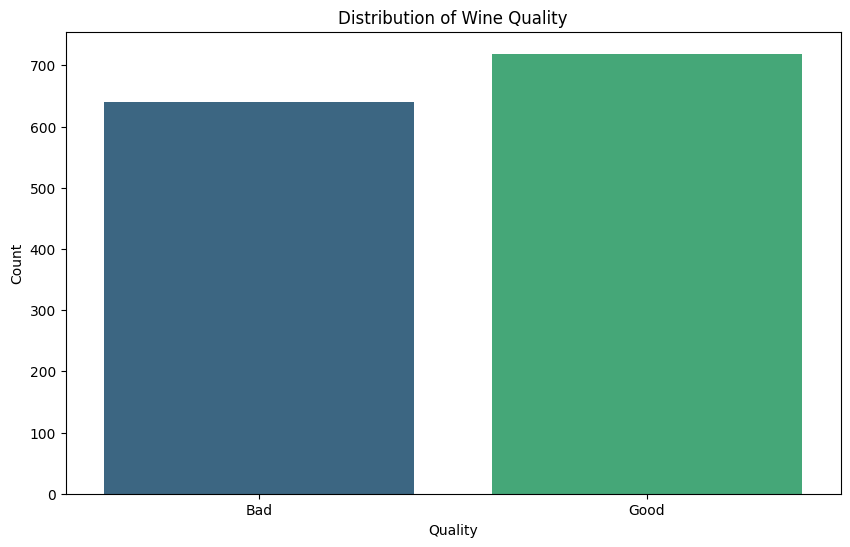

In [918]:
# Create a box plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='quality_label', data=red_df, palette='viridis')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')

# Set the tick labels
ax.set_xticks(range(2))
ax.set_xticklabels(['Bad', 'Good'])

plt.show()

#####This graph visually demonstrates  the balance of the training data, which suggests it will be ideal for the machine learning model.

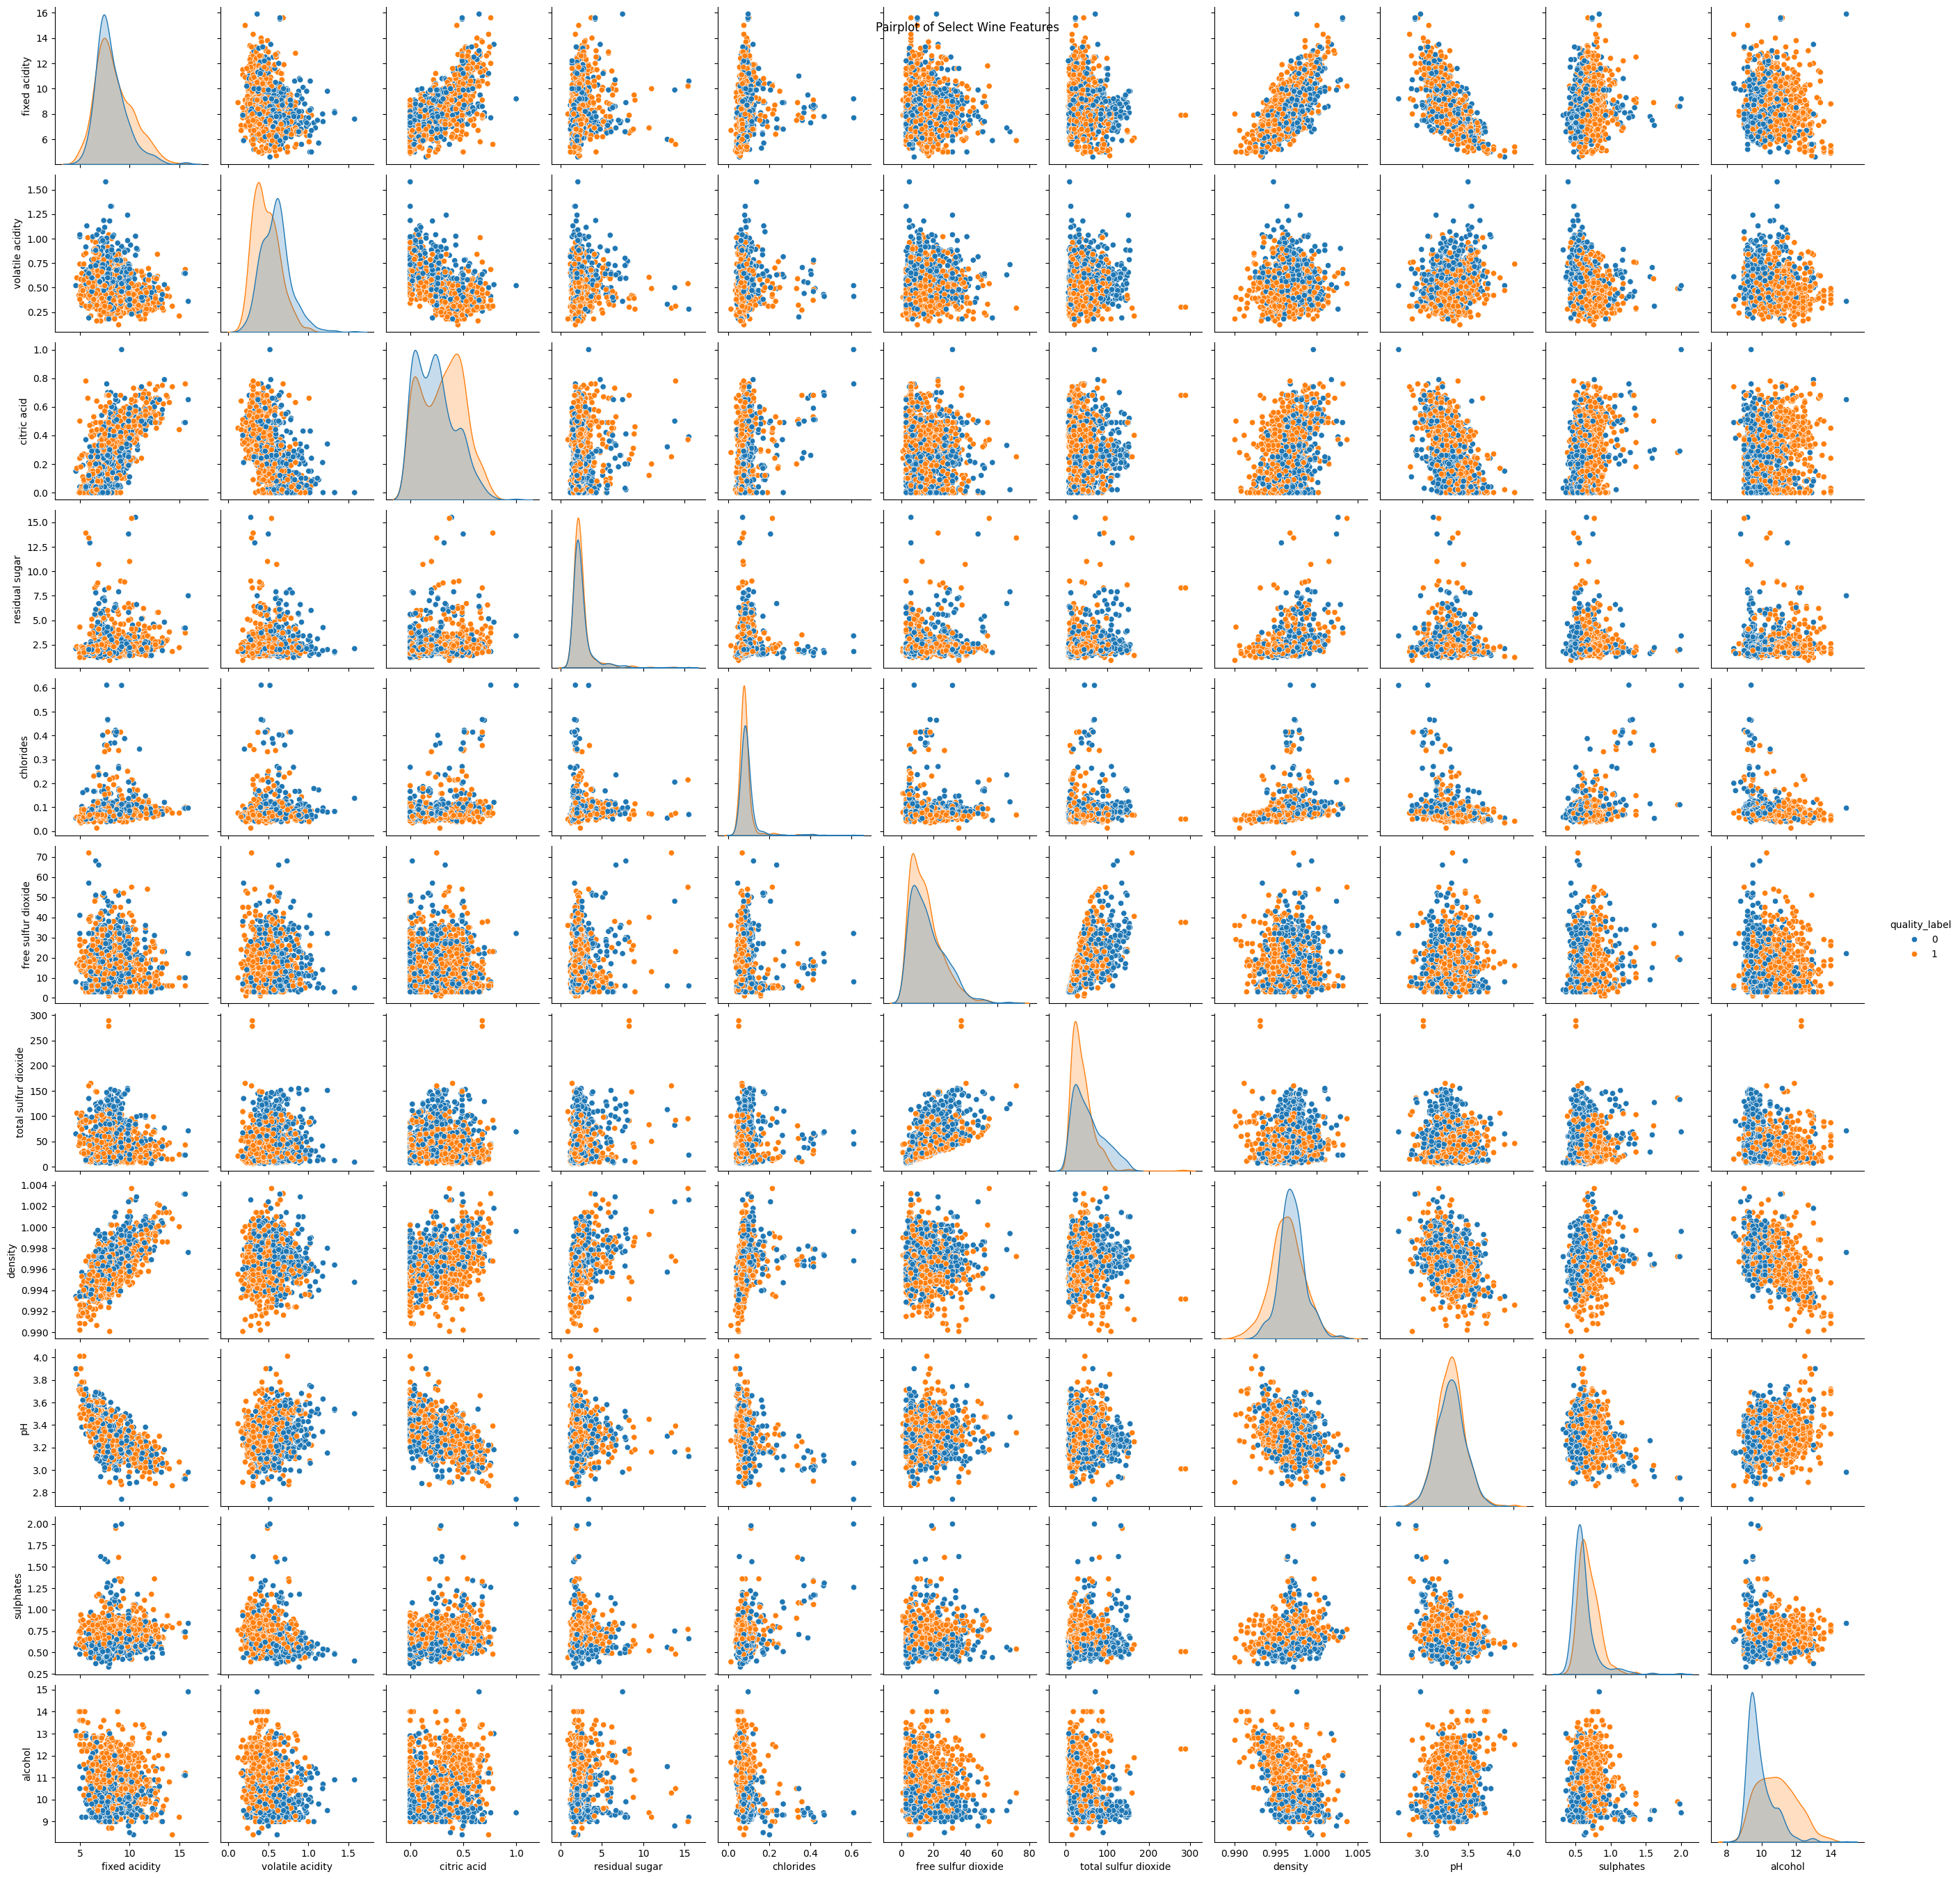

In [919]:
sns.pairplot(red_df, hue='quality_label', vars=features)
plt.suptitle('Pairplot of Select Wine Features')
plt.show()


These graphs provide insights into how each feature interacts with one another and how these interactions impact the quality of the wine. In the visualisations, bad quality wine is represented by blue, while good quality wine is depicted in orange.

A key observation is the strong correlation between alcohol levels and wine quality, as illustrated in the bottom-right graph. Good quality wine tends to have alcohol content concentrated towards the lower end of the spectrum, whereas bad quality wine shows a wider range of alcohol content, with a noticeable peak around 11 to 12 percent. This suggests that higher alcohol levels may be associated with poorer quality in this dataset.

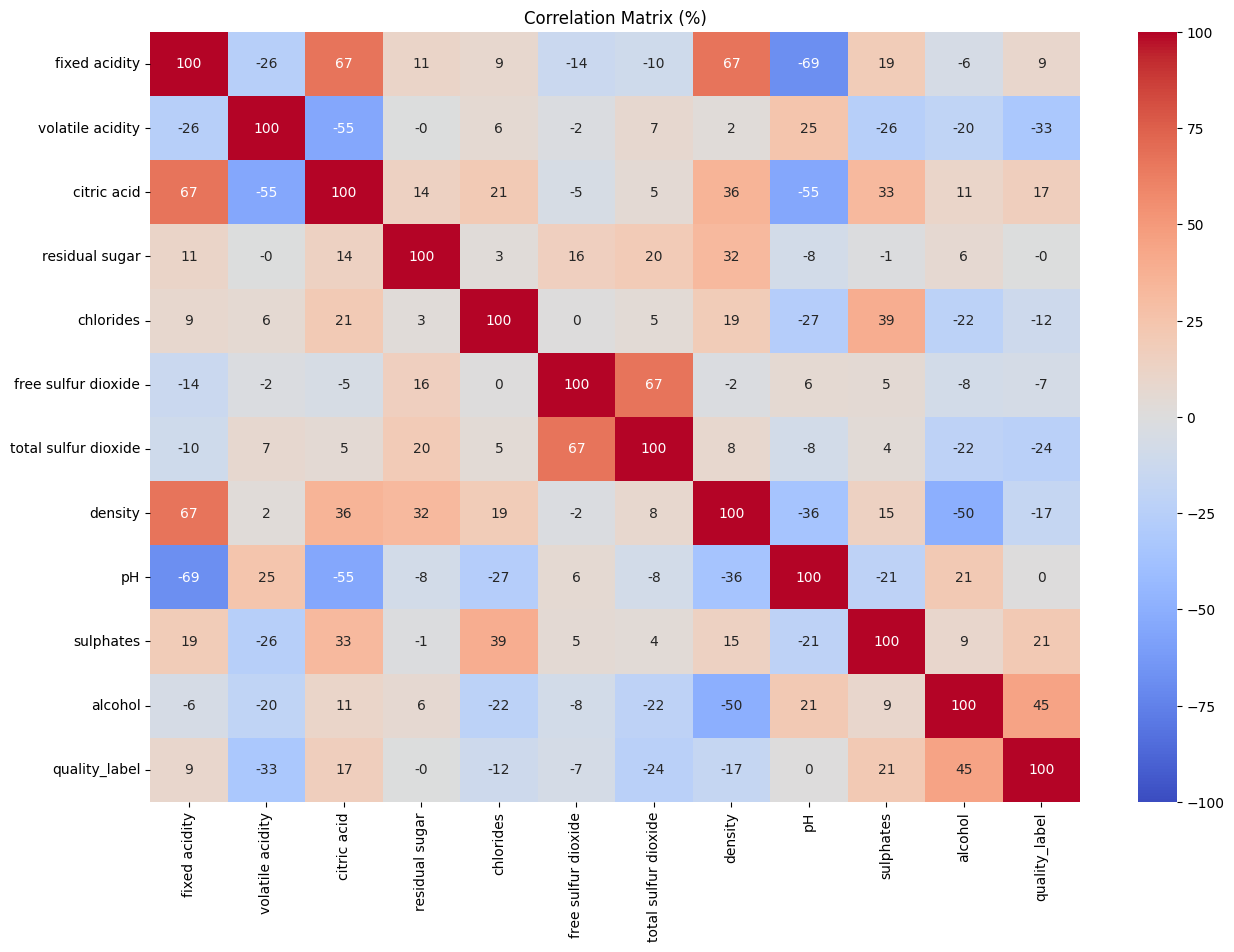

In [920]:
#Correlation matrix
plt.figure(figsize=(15, 10))
corr_matrix = red_df.corr() * 100
sns.heatmap(corr_matrix, annot=True, fmt=".0f", cmap='coolwarm', vmin=-100, vmax=100)
plt.title('Correlation Matrix (%)')
plt.show()

#####This heatmap confirms the earlier observation that alcohol significantly impacts wine quality, exhibiting the highest correlation with quality among all features. Interestingly, the heatmap also reveals strong correlations between several other features, which could potentially affect the performance of our machine learning model if not addressed. To further investigate, another heatmap was created to highlight only the strong correlations, simplifying the visualisation by colouring any box white with the number '1' if the correlation is greater than 0.65. This simplified heatmap helps to quickly identify and focus on pairs of features with substantial interdependencies.

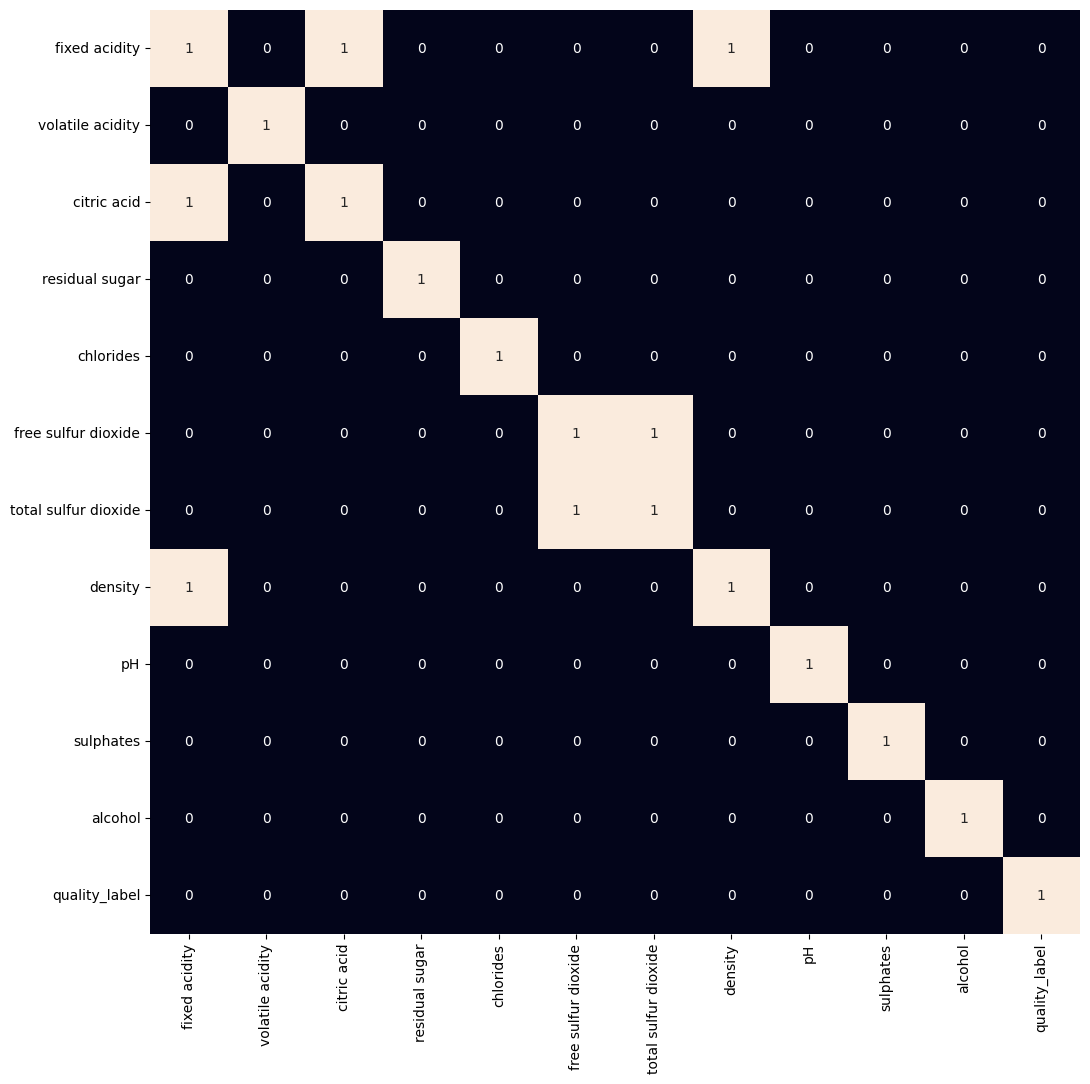

In [921]:
plt.figure(figsize=(12, 12))
sns.heatmap(red_df.corr() > 0.65, annot=True, cbar=False)
plt.show()


#####From this heatmap, we can observe that there is a significant correlation between total sulphur dioxide and free sulphur dioxide. There is also a strong correlation between fixed acidity and density, as well as with citric acid. Combining this finding with the observations from the previous heatmap, free sulphur dioxide and fixed acidity will be removed as they have a lower impact on quality compared to the other correlated features. This step is essential to reduce multicollinearity and enhance the performance of our machine learning model.

In [922]:
red_df = red_df.drop(['free sulfur dioxide', 'fixed acidity'], axis=1)



---



##**Splitting dataset**

#####The dataset is split into training, testing, and validation sets to ensure that machine learning models are evaluated and optimised effectively. The training set is used to train the model by adjusting its parameters to learn patterns from the data. The validation set is used during the training process to tune hyperparameters and prevent overfitting by providing an unbiased evaluation of the model's performance. The testing set is used after the model is fully trained to assess its generalisation ability on unseen data, giving a final estimate of model performance. A 70:15:15 split balances the need for sufficient training data while maintaining good evaluation through separate validation and testing sets, ensuring the model's reliability and accuracy.

#####In this dataset, the target variable (y) is the 'quality_label', which classifies the wine as either 'good' or 'bad'. The features (X) consist of the chemical properties of the wine. Due to the balanced nature of the dataset, there is no need to apply under-sampling or over-sampling techniques.

In [923]:
X = red_df.drop('quality_label', axis=1)
y = red_df['quality_label']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


StandardScaler is used in this case to standardise features.This method ensures that features are on the same scale, which can improve the interpretability of feature importances and facilitate comparisons between different models or datasets. Additionally, in cases where preprocessing is consistent across various models in a pipeline, applying StandardScaler can help maintain uniformity and ensure that all models are evaluated on a standardised version of the dataset.

In [924]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)



---



##**Random Forrest Classifier**


A Random Forest Classifier is well-suited for this use case. The red wine dataset has features that exhibit non-linear relationships with each other and with the target variable, making the Random Forest Classifier ideal due to its ability to handle such complex interactions without extensive parameter tuning. This model combines multiple decision trees to improve accuracy, which is crucial given the number of features in this dataset. The classifier can manage categorical and continuous features, handle missing values, and provide insights into feature importance, which is valuable for understanding which characteristics most influence wine quality. Furthermore, Random Forests are less prone to overfitting compared to individual decision trees, making them suitable for datasets such as this one.

A simple model is initially implemented with plans to further refine it during the hyperparameter tuning phase.

In [944]:
rf_classifier = RandomForestClassifier(random_state=42)

In [945]:
# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Once the model is trained, the testing data is used to evaluate its performance using the 'predict()' method. This method generates predictions on the unseen testing data, allowing for an assessment of the model's accuracy, precision, recall, and other relevant metrics. By evaluating the model on the testing set, we can ascertain its ability to generalise to new data.

In [946]:
# Predict on the test set
y_pred_val = rf_classifier.predict(X_val)

# Calculate classification metrics for test set
accuracy_val = accuracy_score(y_val, y_pred_val)
classification_rep_test = classification_report(y_val, y_pred_val)

In [947]:
# Print classification metrics for validaiton set
print("Original Model Validation Set Metrics:")
print(f"Accuracy: {accuracy_val:.4f}")
print("\nClassification Report:")
print(classification_rep_test)

Original Model Validation Set Metrics:
Accuracy: 0.7843

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.77        96
           1       0.80      0.79      0.79       108

    accuracy                           0.78       204
   macro avg       0.78      0.78      0.78       204
weighted avg       0.78      0.78      0.78       204



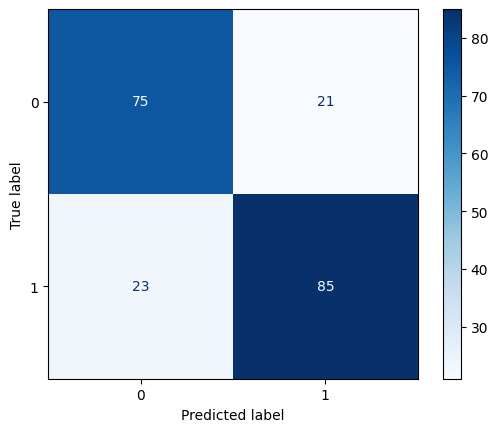

In [948]:
cm = confusion_matrix(y_val, y_pred_val)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [949]:
importances = rf_classifier.feature_importances_
feature_names = X.columns

In [950]:
indices = np.argsort(importances)[::-1]

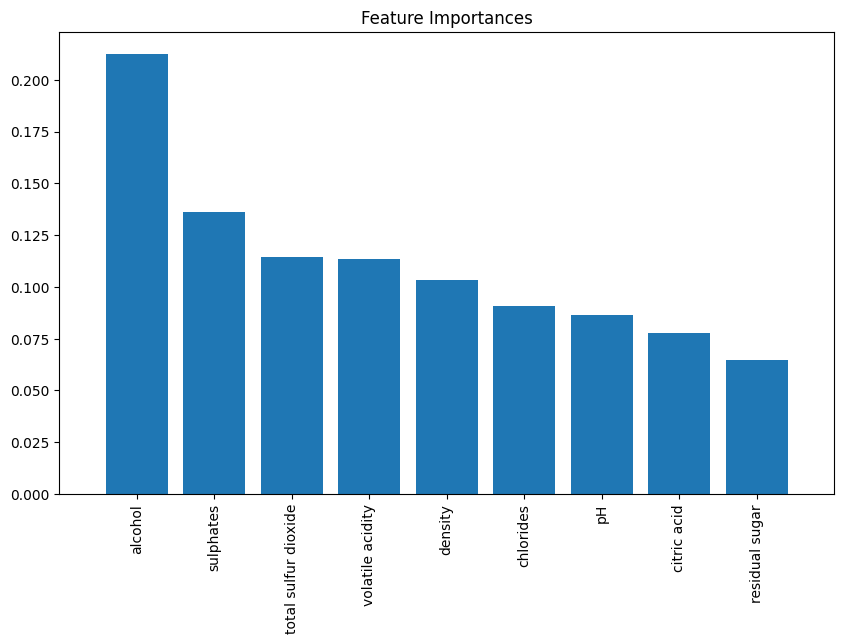

In [951]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

The model demonstrates solid performance with an overall accuracy of 78%, indicating that it correctly predicts the class approximately 78% of the time. For class 0 (bad quality wine), the model achieves a precision of 77%, a recall of 78%, and an F1-score of 77%, reflecting a strong ability to identify bad quality wine while maintaining a good balance between precision and recall. For class 1 (good quality wine), the precision is 80%, the recall is 79%, and the F1-score is 79%, showing a similarly balanced and effective performance.

The macro average metrics, all at 78% for precision, recall, and F1-score, suggest a well-balanced performance across both classes, treating each class equally. The weighted averages, also at 78%, account for class support and demonstrate that the model's performance remains consistent despite class imbalance, with class 1 having more instances than class 0.

The confusion matrix further illustrates the model's strong performance. Overall, while the model is effective, there is room for further refinement. Additional hyperparameter tuning and optimisation are planned to enhance these performance metrics and improve the model's predictive capabilities.


As expected, the alcohol feature has the greatest impact out of all the other features followed by sulphates and total sulfur dioxide. Chlorides, pH and citric acid and residual sugars have the least importance in this model. For this project, these features will not be removed as they are close in importance to the other features. Feature removal can be useful in reducing model complexity, model lentency and improve overall performance, however it is doubtful it will have much benefit here.



---



##**Hyperparameter tuning and Model Evaluation**

Hyperparameter tuning is the process of systematically searching for the optimal set of hyperparameters for a machine learning model to improve its performance. Unlike model parameters, which are learned from the training data, hyperparameters are predefined and control the learning process and structure of the model. GridSearchCV is a technique used for this tuning process, where it tests a specified range of hyperparameter values across a grid. By evaluating the model's performance for every combination of hyperparameters using cross-validation, GridSearchCV helps in identifying the best parameter set that maximises the model's predictive accuracy. This method ensures a thorough search over the hyperparameter space and provides a reliable estimate of the model's performance with the chosen parameters, thus enhancing the model's effectiveness and ability to correctly predict on novel data.




---



The cv_strategy is used evaluate of the machine learning model's performance. StratifiedKFold is a cross-validation technique that divides the dataset into n_splits folds, while maintaining the proportion of each class in every fold. This ensures that each fold is representative of the overall class distribution. Shuffling the data before splitting, as specified by shuffle=True, helps in randomising the samples and reducing any potential biases due to the order of the data. Setting random_state=42 ensures reproducibility by providing a fixed seed for the random number generator, so the splits can be consistently replicated. This combination of stratification, shuffling, and reproducibility enhances the reliability of model performance estimates and ensures that the evaluation is both fair and consistent.

In [952]:
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

The 'param_grid_rf' is a dictionary which defines a range of hyperparameters for tuning the Random Forest model. It's important to find a balance in the number of values for each hyperparameter to improve the model without overwhelming the grid search process, which can be time-consuming and costly. The 'n_estimators' parameter specifies that the model will be assessed with either 100 or 200 trees in the forest. The 'max_depth' parameter tests various maximum tree depths, allowing trees to grow until all leaves are pure or limiting them to depths of 10 or 20. 'min_samples_split' and 'min_samples_leaf' control the minimum number of samples needed to split an internal node or be at a leaf node, respectively. The 'bootstrap' parameter indicates whether bootstrapping will be applied, while 'max_features' explores different strategies for determining the number of features to consider when splitting a node. This grid allows for comprehensive hyperparameter optimisation, aiding greatly in fine-tuning the model for improved performance.

In [953]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4],
    'bootstrap': [True],
    'max_features': ['sqrt', 'log2', None]
}

This intialises the grid search with all relevant parameters.

In [954]:
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=cv_strategy, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 4],
                         'min_samples_split': [2, 10],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

After the GridSearch has completed, the best parameters and the cross-validation are printed. The best score is 0.75 which is a good score.

In [956]:
# Output the best parameters and score
print("Best parameters found: ", grid_search_rf.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_rf.best_score_))

Best parameters found:  {'bootstrap': True, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.75


In [957]:
# Get best model from GridSearchCV
best_rf = grid_search_rf.best_estimator_

# Evaluate the model on the validation set
best_y_pred_val = best_rf.predict(X_val)

# Evaluate performance on validation data
print("Improved Model Validation Set Metrics:")
print(classification_report(y_val, best_y_pred_val, zero_division=1))

Improved Model Validation Set Metrics:
              precision    recall  f1-score   support

           0       0.74      0.80      0.77        96
           1       0.81      0.75      0.78       108

    accuracy                           0.77       204
   macro avg       0.78      0.78      0.77       204
weighted avg       0.78      0.77      0.77       204



In [958]:
# Evaluate the model on the test set
best_y_pred_test = best_rf.predict(X_test)

# Evaluate performance on test data
print("Improved Model Test Set Metrics:")
print(classification_report(y_test, best_y_pred_test, zero_division=1))

Improved Model Test Set Metrics:
              precision    recall  f1-score   support

           0       0.72      0.79      0.76        96
           1       0.80      0.73      0.76       108

    accuracy                           0.76       204
   macro avg       0.76      0.76      0.76       204
weighted avg       0.76      0.76      0.76       204



As the validation data metrics is lower than for the original model, a decision was made to run the test set using the original model to compare.

In [959]:
# Evaluate the original model on the test set
original_y_pred_test = rf_classifier.predict(X_test)

# Evaluate performance on test data
print("Original Test Set Metrics:")
print(classification_report(y_test, original_y_pred_test, zero_division=1))

Original Test Set Metrics:
              precision    recall  f1-score   support

           0       0.70      0.78      0.74        96
           1       0.78      0.70      0.74       108

    accuracy                           0.74       204
   macro avg       0.74      0.74      0.74       204
weighted avg       0.74      0.74      0.74       204



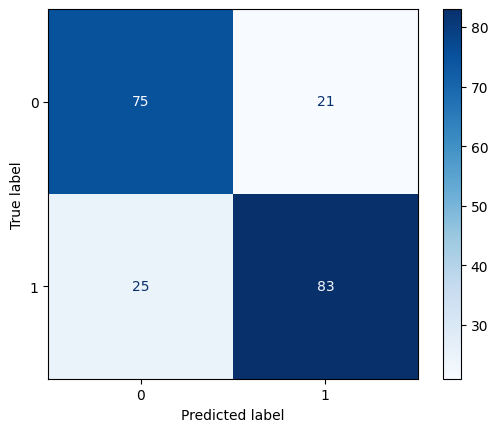

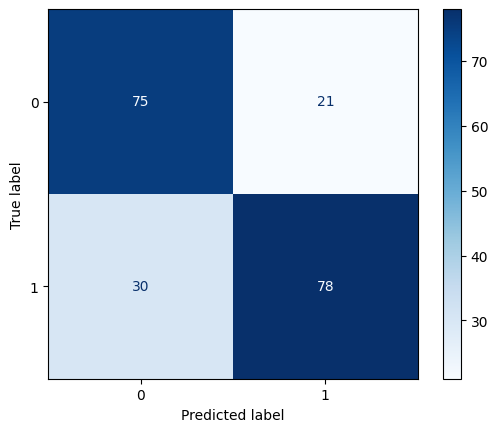

In [940]:
#Confusion matrix for improved model on validation set and test set

cm = confusion_matrix(y_val, best_y_pred_val)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

test_cm = confusion_matrix(y_test, best_y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=test_cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

The comparison between the original and improved Random Forest models reveals insightful performance dynamics. Initially, the original model demonstrated a commendable performance with an overall accuracy of 784% on the validation set, accompanied by a balanced precision, recall, and F1-score for both classes. Specifically, it showed a precision of 77% for class 0 (bad quality wine) and 80% for class 1 (good quality wine), with corresponding recall values of 78% and 79%, respectively. However, when this model was applied to the test set, its performance slightly diminished, with an accuracy of 74%. The precision for class 0 dropped to 70%, while recall remained relatively stable at 78%. Conversely, the precision for class 1 was also 78%, and recall decreased to 70%, highlighting some inconsistencies in its ability to generalise to unseen data.

In contrast, the improved model, after hyperparameter tuning, showed enhanced performance metrics. On the validation set, it achieved an accuracy of 76% with improved precision and recall for both classes. The precision for class 0 was 72% with a recall of 79%, while for class 1, precision was 80% with a recall of 73%. Notably, this refined model performed better on novel data from the test set, achieving an accuracy of 76%. This indicates that the improved model, despite similar F1-scores compared to the original, has a more robust ability to handle new, unseen data, confirming that hyperparameter tuning can significantly enhance model reliability and generalisation. The improved model's superior performance on the test set underscores its enhanced capability in adapting to novel data and reflects a successful optimisation of the Random Forest classifier for this task.

In [960]:
# ROC Curve
#Initialise the lists
y_prob_val = best_rf.predict_proba(X_val)
fpr = {}
tpr = {}
roc_auc = {}

In [961]:
#For loop to gather data needed for ROC Curve
for i in range(len(red_df['quality_label'].unique())):
    fpr[i], tpr[i], _ = roc_curve(y_val, y_prob_val[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])


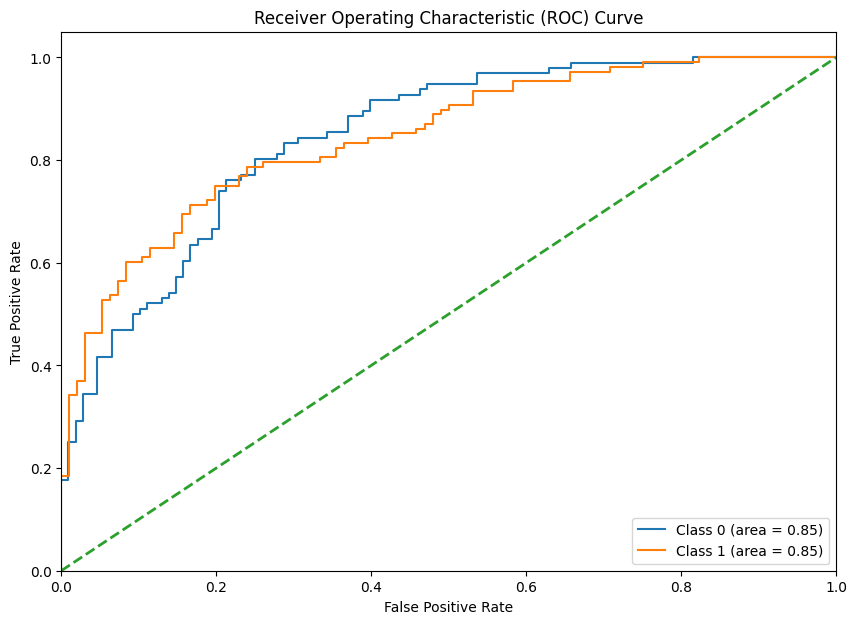

In [962]:
# Plot ROC Curve
plt.figure(figsize=(10, 7))
for i in range(len(red_df['quality_label'].unique())):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The area under the ROC curve (AUC-ROC) of 0.85 for both class 0 and class 1 indicates a strong and balanced performance of the model in distinguishing between the two classes. The ROC curve plots the true positive rate (sensitivity) against the false positive rate (1-specificity) at various threshold settings, and the AUC measures the model's ability to correctly classify instances across all thresholds. An AUC value of 0.85 for each class suggests that the model has a high probability of ranking a randomly chosen positive instance higher than a randomly chosen negative instance. This performance reflects both good sensitivity and specificity, with the model effectively differentiating between class 0 and class 1 without being biased toward one class. The consistent AUC across both classes signifies that the model performs well in a balanced manner, offering reliable classification performance and minimal trade-off between sensitivity and specificity.



---



#**Final Thoughts**


---



The final validation results of the model demonstrate a robust performance, effectively distinguishing between different quality levels of wine. Its balanced precision and recall indicate that it performs well in classifying both 'good' and 'bad' wines, reflecting its overall reliability and effectiveness in predicting wine quality.

The comparison between the original and improved Random Forest models revealed some intriguing performance dynamics. Initially, the original model seemed to be the better model due to performance with an overall accuracy of 78% on the validation set, accompanied by balanced precision, recall, and F1-score for both classes. It showed a precision of 77% for class 0 (bad quality wine) and 80% for class 1 (good quality wine), with corresponding recall values of 78% and 79%, respectively. In contrast, the improved model, which was fine tuned through hyperparameter optimisation, achieved an accuracy of 77% on the validation set with enhanced precision and recall. The precision for class 0 was 74% with a recall of 80%, while for class 1, precision was 81% with a recall of 75%. The precision score was slightly lower for the improved model compared to the original model on the validation set.

Given this unexpected outcome, the decision was made to apply the test data to the original model and the improved model, despite it being somewhat unorthodox. This choice was based on the observation that the original model had slightly outperformed the improved model on the validation set. When applied to the test set, however, the original model's performance was unexpectedly lower, with an accuracy of 74%. The precision for class 0 dropped to 70%, while recall went to at 78%. Conversely, the precision for class 1 was 78%, and recall decreased to 70%, highlighting some inconsistencies in its ability to generalise to unseen data.

In contrast, the improved model ultimately proved to be superior, showcasing the ability to handle new, unseen data. Notably, it achieved an accuracy of 76% on the test set, reflecting its enhanced capability in adapting to novel data.

Future improvements could involve adjusting the model to predict wine quality according to the specific quality classes present in the dataset. Although this was not feasible for this project due to various constraints, it would be beneficial to explore whether the current model or alternative approaches, such as a feedforward neural network, could be optimised for this task.

Additionally, the current model simplifies wine categorisation into 'good' and 'bad' quality, which may be too basic. Exploring a more detailed classification into 'low', 'medium', and 'high' quality could provide more nuanced insights, though the imbalanced nature of the dataset posed challenges for this approach.

Overall, this project has successfully developed a machine learning model capable of predicting the quality of wine based on its chemical properties. The initial model was refined through hyperparameter tuning, leading to improved performance, as illustrated by the enhanced metrics.